In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec

from adaptive_dg.datasets import SimpsonDataset

In [2]:
sns.set_style("whitegrid")

In [3]:
color1 = "#96bf04"
color2 = "#2d04bf"
color3 = "#bf8b04"
color4 = "#bf0496"
color5 = "#710000"

In [4]:
palette = [color1, color2, color3, color4, color5]

In [5]:
model_data = pd.read_csv("simpson_results.csv")
model_data = model_data[model_data["Model"].isin(["Baseline", "Multi-Head Attention"])]
model_data.head()

,Model,Spacing,Accuracy,Set Size
0,Baseline,0.05,0.5316,1
1,Multi-Head Attention,0.05,0.5906,8
4,Multi-Head Attention,0.05,0.6733,32
7,Multi-Head Attention,0.05,0.8180,128
10,Baseline,0.10,0.5492,1


In [6]:
SimpsonDataset.n_domains = 5
SimpsonDataset.n_samples = 10_000
dataset = SimpsonDataset("data")

In [7]:
dataset_data = pd.DataFrame({
    "Feature": dataset.data.squeeze().tolist(),
    "Regression Target": dataset.targets.squeeze().tolist(),
    "Domain": (dataset.domains.argmax(dim=1) + 1).tolist(),
})

dataset_data.head()

,Feature,Regression Target,Domain
0,-0.872898,9.910160,1
1,-0.847350,9.630679,1
2,0.553859,9.632425,1
3,-0.125730,9.528999,1
4,0.747308,10.838008,1


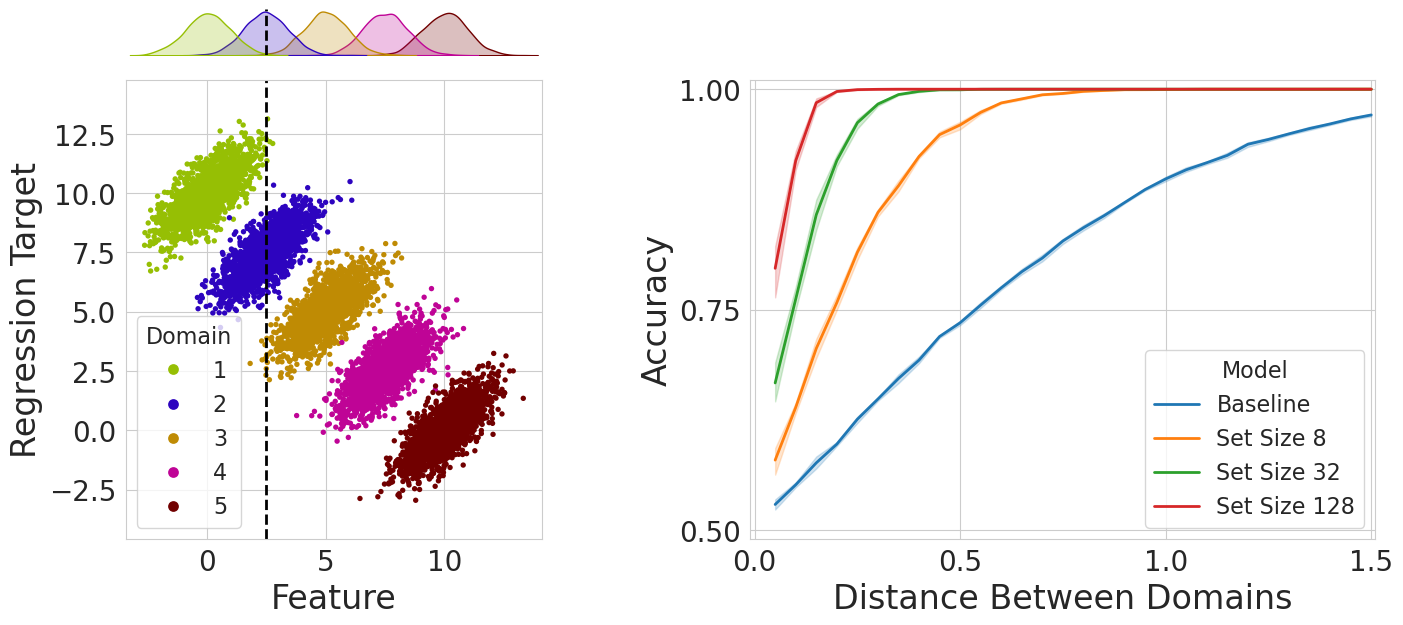

In [32]:
plt.rc("font", size=16)
plt.rc("axes", labelsize=24)
plt.rc("xtick", labelsize=20)
plt.rc("ytick", labelsize=20)

scale = 1.25

# widths of the scatter and line plots
width_left = 5
width_right = 7.5

# heights of the kde plot and the scatter/line plots
height_top = 0.5
height_bottom = 5

# width of the gap between the scatter and line plots
width_gap = 0.4

# height of the gap between the kde and scatter plot
height_gap = 0.1

total_width = scale * (width_left + width_gap + width_right)
total_height = scale * (height_top + height_bottom)

fig = plt.figure(figsize=(total_width, total_height))

gs = GridSpec(2, 2, width_ratios=[width_left, width_right], height_ratios=[height_top, height_bottom], hspace=height_gap, wspace=width_gap)

scatter_ax = fig.add_subplot(gs[1, 0])
sns.scatterplot(data=dataset_data, x="Feature", y="Regression Target", hue="Domain", s=15, lw=0, palette=palette, ax=scatter_ax)
scatter_ax.set_aspect("equal", adjustable="datalim")

scatter_ax.axvline(2.5, color="black", ls="--", lw=2)

if legend := scatter_ax.get_legend():
    legend.remove()

kde_ax = fig.add_subplot(gs[0, 0])
sns.kdeplot(data=dataset_data, x="Feature", hue="Domain", palette=palette, ax=kde_ax, fill=True)
kde_ax.set_xlim(scatter_ax.get_xlim())
kde_ax.set_axis_off()

kde_ax.axvline(2.5, color="black", ls="--", lw=2)

if legend := kde_ax.get_legend():
    legend.remove()

handles, labels = scatter_ax.get_legend_handles_labels()
scatter_ax.legend(handles, labels, loc="lower left", title="Domain", markerscale=2)

line_ax = fig.add_subplot(gs[1, 1])
sns.lineplot(data=model_data, x="Spacing", y="Accuracy", hue="Set Size", palette="tab10", ax=line_ax, lw=2)

line_ax.set_xlabel(f"Distance Between Domains")

line_ax.set_xlim(-0.01, 1.51)
line_ax.set_ylim(0.49, 1.01)

line_ax.set_xticks([0, 0.5, 1, 1.5])
line_ax.set_yticks([0.5, 0.75, 1.0])

if legend := line_ax.get_legend():
    legend.remove()

handles, labels = line_ax.get_legend_handles_labels()
labels = ["Baseline"] + [f"Set Size {s}" for s in labels[1:]]
line_ax.legend(handles, labels, loc="lower right", title="Model")

plt.savefig("figures/simpson-spacing.png", dpi=150, bbox_inches="tight")
plt.show()